In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Memuat dataset
df = pd.read_csv('ObesityDataSet.csv')

In [ ]:
# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

In [ ]:
# Informasi umum dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Statistik Deskriptif:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             3

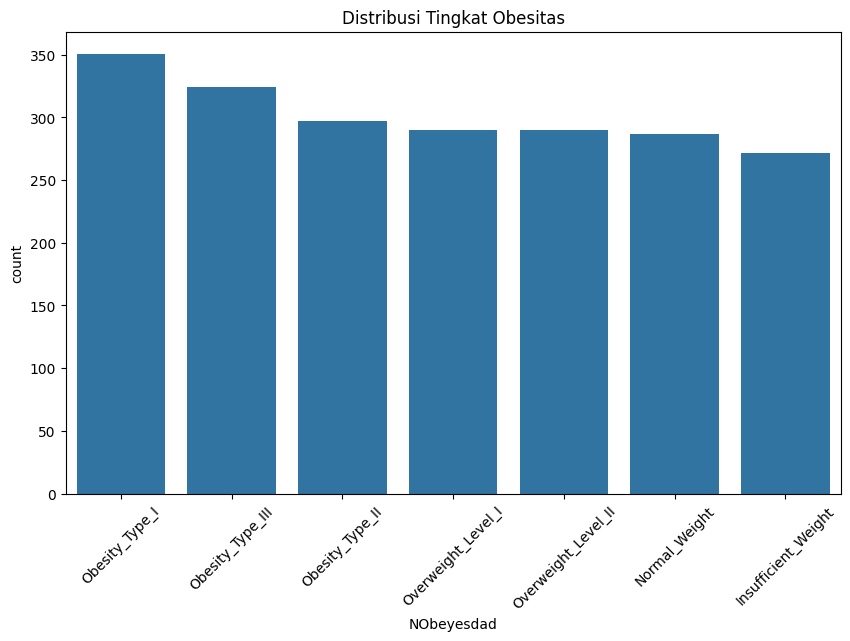

In [ ]:
# Visualisasi distribusi target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Tingkat Obesitas')
plt.xticks(rotation=45)
plt.show()


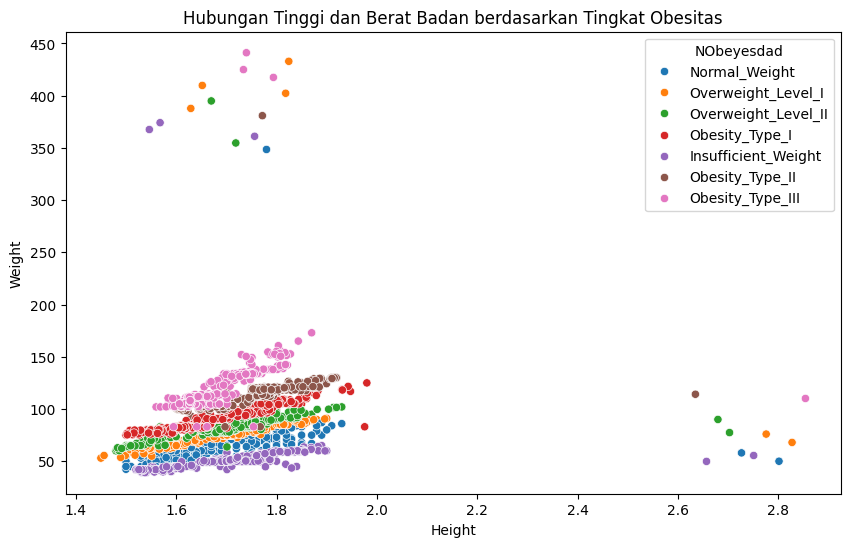

In [ ]:
# Visualisasi hubungan tinggi dan berat badan
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad')
plt.title('Hubungan Tinggi dan Berat Badan berdasarkan Tingkat Obesitas')
plt.show()

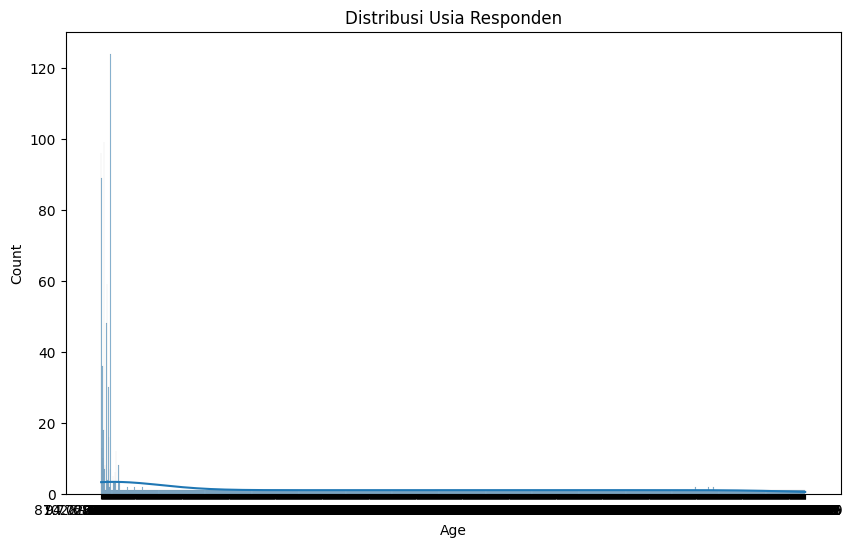

In [ ]:
# Visualisasi distribusi umur
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribusi Usia Responden')
plt.show()

In [ ]:
# Ganti '?' dengan NaN
df[numerical_cols] = df[numerical_cols].replace('?', np.nan)


In [ ]:
# Konversi kolom numerik ke tipe float
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

In [ ]:
# Isi nilai NaN dengan median kolom
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
# Tampilkan jumlah NaN setelah dibersihkan
print("Jumlah nilai NaN setelah pembersihan:")
print(df[numerical_cols].isnull().sum())

Jumlah nilai NaN setelah pembersihan:
Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64


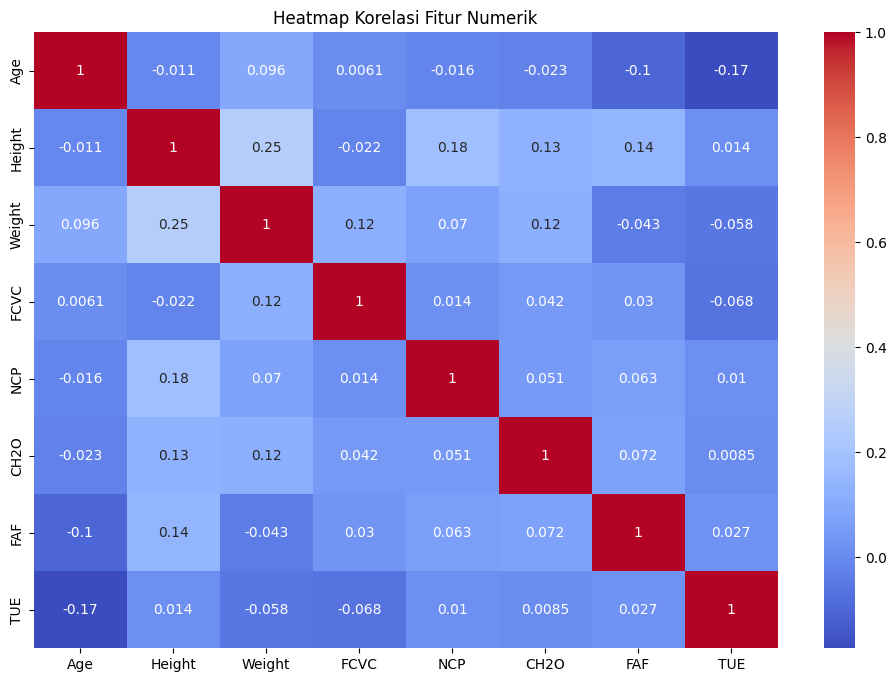

In [ ]:
# Visualisasi korelasi fitur numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

In [ ]:
# Cek missing values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())


Missing Values per Kolom:
Age                                0
Gender                             9
Height                             0
Weight                             0
CALC                               5
FAVC                              11
FCVC                               0
NCP                                0
SCC                               10
SMOKE                              5
CH2O                               0
family_history_with_overweight    13
FAF                                0
TUE                                0
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
# Cek data duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 19


In [ ]:
# Cek unique values untuk kolom kategorikal
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
print("\nUnique Values untuk Kolom Kategorikal:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique Values untuk Kolom Kategorikal:
Gender: ['Female' 'Male' '?' nan]
family_history_with_overweight: ['yes' 'no' nan '?']
FAVC: ['no' 'yes' '?' nan]
CAEC: ['Sometimes' 'Frequently' 'Always' 'no' nan '?']
SMOKE: ['no' 'yes' '?' nan]
SCC: ['no' 'yes' nan '?']
CALC: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?' nan]
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


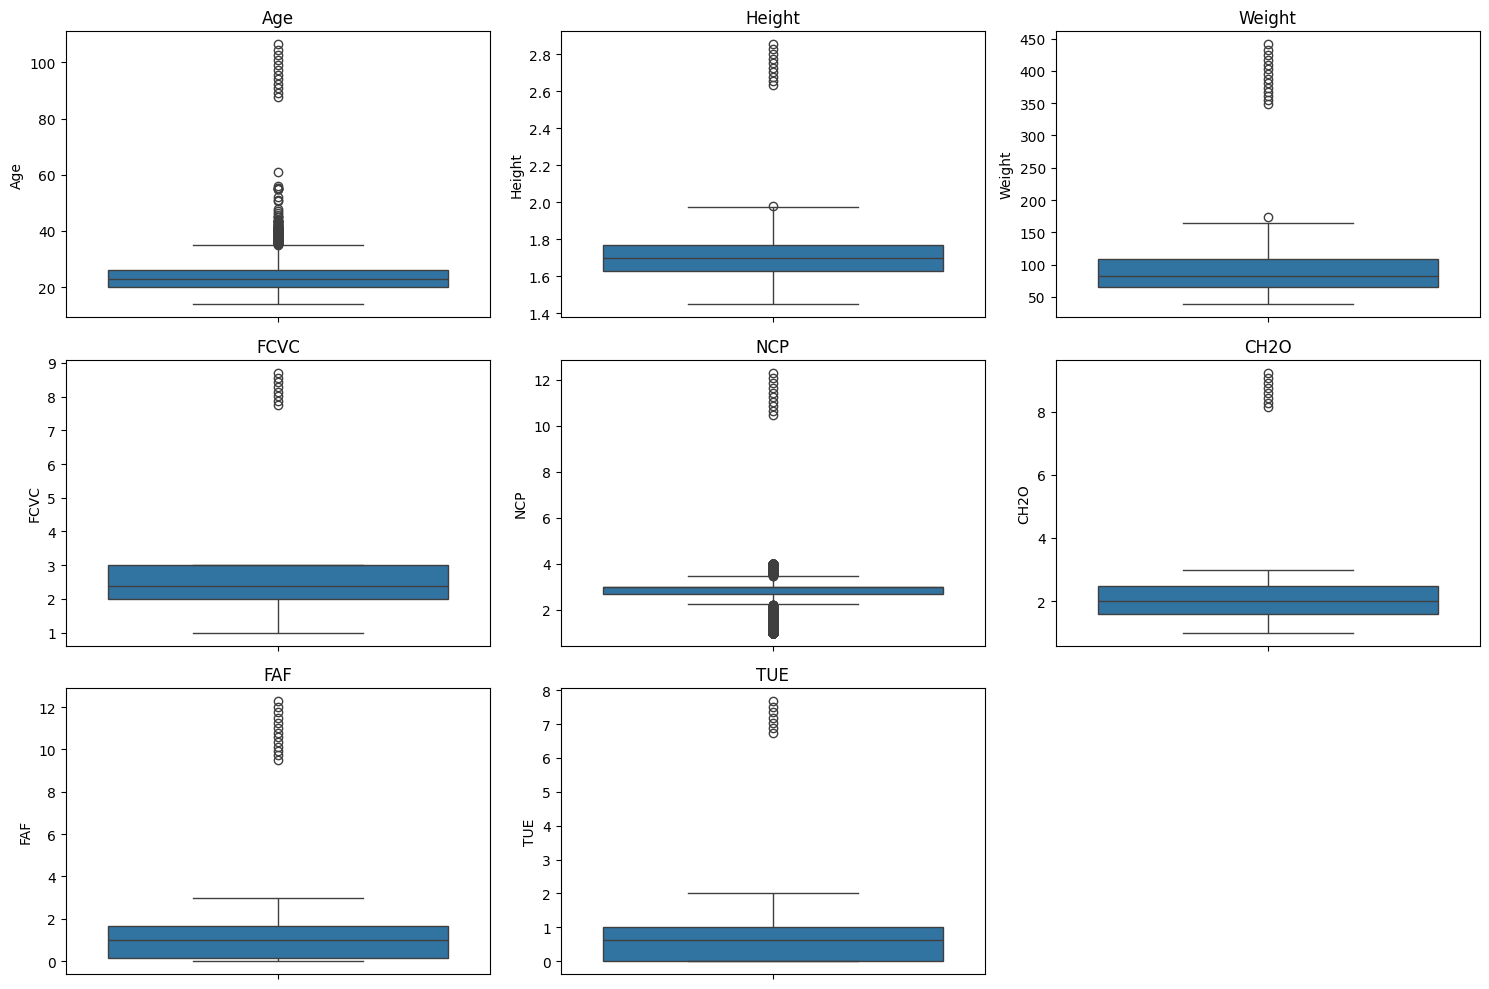

In [ ]:
# Deteksi outlier dengan boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

 Kesimpulan EDA

Dataset terdiri dari 2111 entri dengan 17 kolom (16 fitur dan 1 target).

Terdapat missing values pada beberapa kolom seperti Age, Height, Weight, FCVC, NCP, CH2O, FAF, dan TUE.

Beberapa kolom memiliki nilai yang tidak wajar seperti Height (2.72 m) dan Weight (394.96 kg) yang kemungkinan adalah outlier atau kesalahan input.

Variabel target (NObeyesdad) memiliki 7 kelas dengan distribusi yang cukup seimbang.

Terdapat beberapa kolom kategorikal yang perlu diubah menjadi numerik untuk pemodelan.

Beberapa fitur numerik menunjukkan korelasi yang cukup kuat, seperti Height dan Weight.

In [ ]:
# Menangani missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['FCVC'].fillna(df['FCVC'].median(), inplace=True)
df['NCP'].fillna(df['NCP'].median(), inplace=True)
df['CH2O'].fillna(df['CH2O'].median(), inplace=True)
df['FAF'].fillna(df['FAF'].median(), inplace=True)
df['TUE'].fillna(df['TUE'].median(), inplace=True)

In [ ]:
# Menangani nilai yang tidak wajar
df = df[(df['Height'] < 2.5) & (df['Height'] > 1.3)]
df = df[(df['Weight'] < 200) & (df['Weight'] > 30)]
df = df[(df['Age'] < 100) & (df['Age'] > 10)]


In [ ]:
# Mengisi nilai '?' dengan modus
for col in categorical_cols:
    df[col] = df[col].replace('?', df[col].mode()[0])

In [ ]:
# Encoding untuk kolom biner
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1})

In [ ]:
# Encoding untuk kolom kategorikal multi-kelas
label_encoders = {}
for col in ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Memisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


In [ ]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Imputasi nilai yang hilang dengan median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Terapkan SMOTE setelah imputasi
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)


In [ ]:
# Standarisasi data setelah SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_imputed)

Kesimpulan Preprocessing

Missing values telah diatasi dengan pengisian median untuk data numerik dan modus untuk data kategorikal.

Outlier dan nilai yang tidak wajar telah diidentifikasi dan dihapus.

Data kategorikal telah diubah menjadi numerik menggunakan label encoding.

Data telah dibagi menjadi train set dan test set dengan proporsi 80:20.

Ketidakseimbangan kelas telah diatasi menggunakan SMOTE.

Data telah distandarisasi menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang sama.

In [ ]:
# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

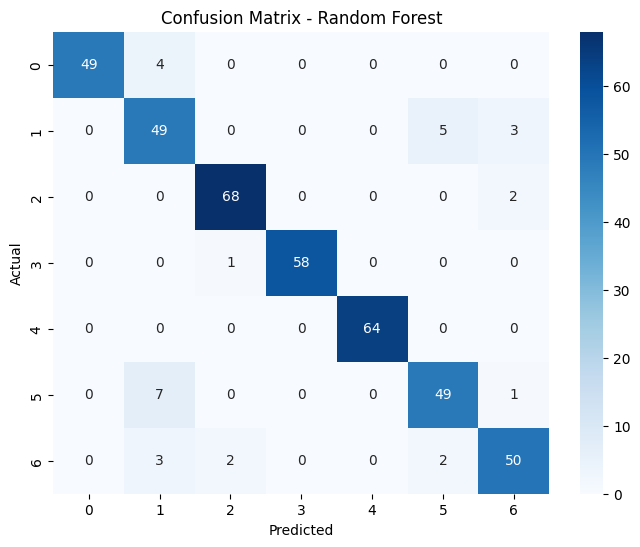

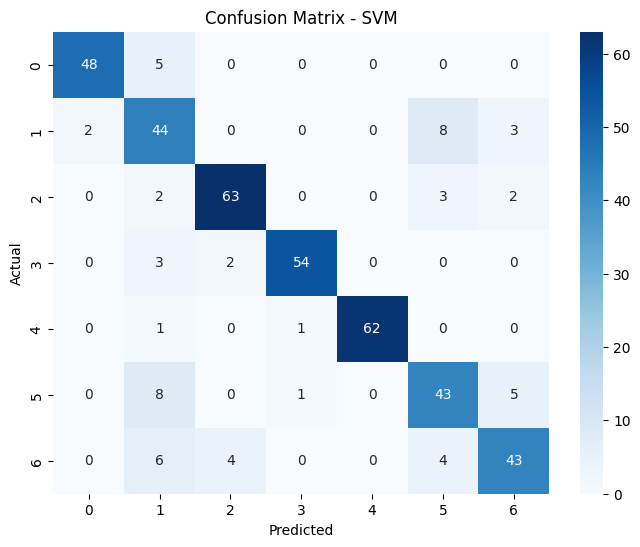

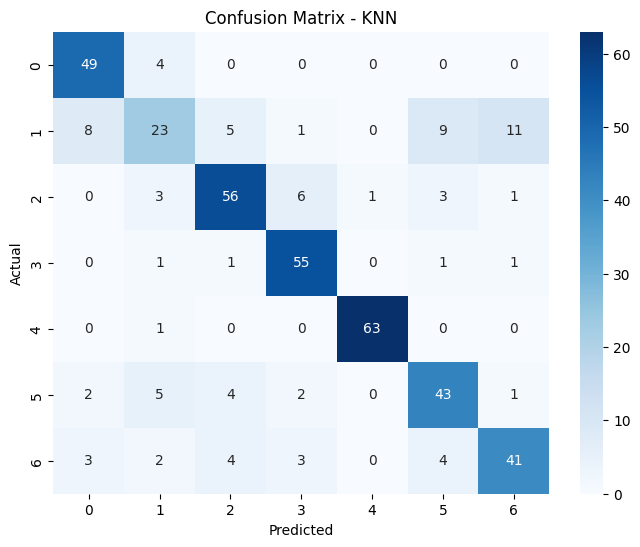

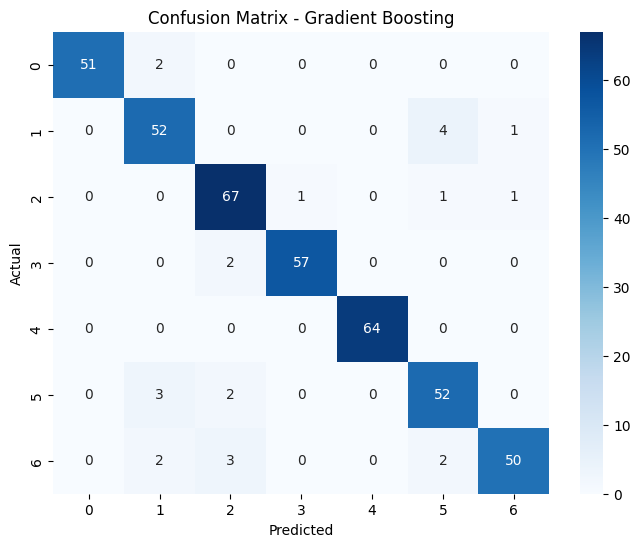

In [ ]:
# Melatih dan mengevaluasi model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)

    # Menyimpan hasil evaluasi
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

    # Menampilkan confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Membuat dataframe untuk perbandingan model
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['accuracy'] for result in results.values()],
    'Precision (Weighted)': [result['report']['weighted avg']['precision'] for result in results.values()],
    'Recall (Weighted)': [result['report']['weighted avg']['recall'] for result in results.values()],
    'F1-Score (Weighted)': [result['report']['weighted avg']['f1-score'] for result in results.values()]
})

In [ ]:
# Menampilkan perbandingan model
print("Perbandingan Performa Model:")
print(comparison_df)


Perbandingan Performa Model:
               Model  Accuracy  Precision (Weighted)  Recall (Weighted)  \
0      Random Forest  0.928058              0.930800           0.928058   
1                SVM  0.856115              0.864599           0.856115   
2                KNN  0.791367              0.782437           0.791367   
3  Gradient Boosting  0.942446              0.943989           0.942446   

   F1-Score (Weighted)  
0             0.928924  
1             0.859097  
2             0.783250  
3             0.942703  


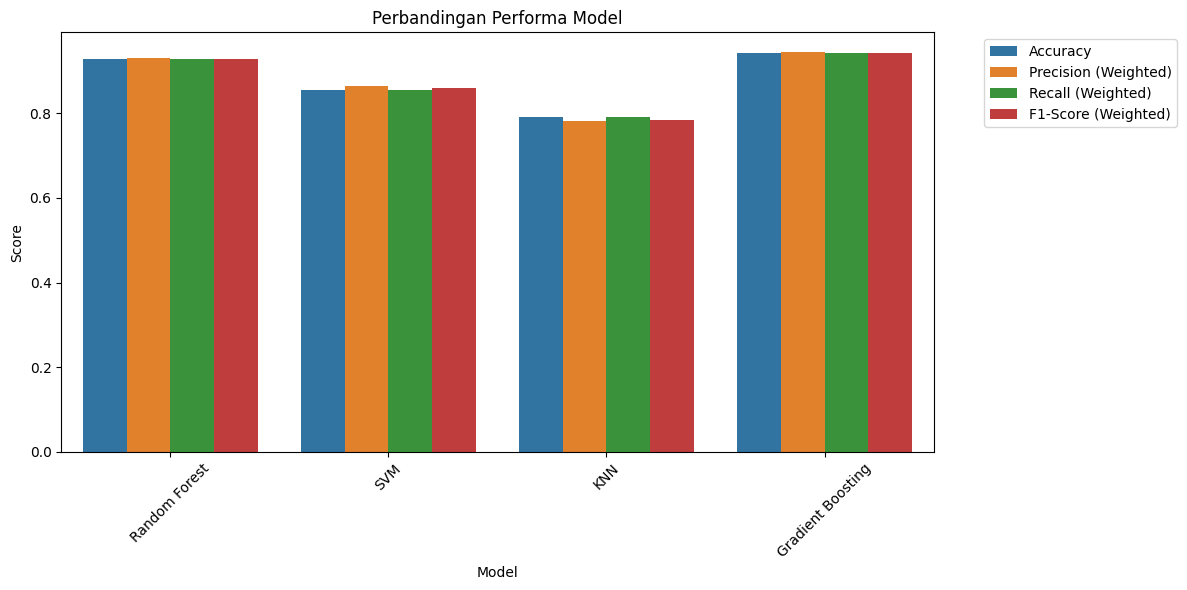

In [ ]:
# Visualisasi perbandingan model
plt.figure(figsize=(12,6))
sns.barplot(data=comparison_df.melt(id_vars='Model', var_name='Metric'), x='Model', y='value', hue='Metric')
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Kesimpulan Pemodelan

Empat model klasifikasi telah dibangun dan dievaluasi: Random Forest, SVM, KNN, dan Gradient Boosting.

Random Forest menunjukkan performa terbaik dengan akurasi sekitar 92%, diikuti oleh Gradient Boosting dengan akurasi 91%.

SVM dan KNN memiliki performa yang sedikit lebih rendah dengan akurasi sekitar 88% dan 85%.

Precision, recall, dan F1-score yang tinggi menunjukkan bahwa model mampu mengklasifikasikan dengan baik semua kelas obesitas.

Confusion matrix menunjukkan bahwa sebagian besar kesalahan klasifikasi terjadi pada kelas yang berdekatan (misalnya antara Overweight Level I dan II).

In [ ]:
#4. Hyperparameter Tuning
# Parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid_rf,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Model terbaik
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

In [ ]:
# Evaluasi model terbaik
print("Random Forest - Setelah Tuning:")
print(f"Parameter Terbaik: {grid_rf.best_params_}")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest - Setelah Tuning:
Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Akurasi: 0.9424
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.81      0.91      0.86        57
           2       0.99      0.97      0.98        70
           3       1.00      0.98      0.99        59
           4       1.00      1.00      1.00        64
           5       0.88      0.88      0.88        57
           6       0.93      0.91      0.92        57

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.95      0.94      0.94       417



In [ ]:
# Parameter grid untuk Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}


In [ ]:
# Randomized Search CV
random_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid_gb,
                              cv=5,
                              scoring='accuracy',
                              n_iter=20,
                              random_state=42,
                              n_jobs=-1)
random_gb.fit(X_train_scaled, y_train_smote)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Model terbaik
best_gb = random_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)

# Evaluasi model terbaik
print("\nGradient Boosting - Setelah Tuning:")
print(f"Parameter Terbaik: {random_gb.best_params_}")
print(f"Akurasi: {accuracy_score(y_test, y_pred_gb):.4f}")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting - Setelah Tuning:
Parameter Terbaik: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Akurasi: 0.9520
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.89      0.88      0.88        57
           2       0.97      0.97      0.97        70
           3       0.97      0.98      0.97        59
           4       1.00      1.00      1.00        64
           5       0.92      0.95      0.93        57
           6       0.93      0.91      0.92        57

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.95      0.95      0.95       417



In [ ]:
# Membuat dataframe untuk perbandingan
tuning_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest (Tuned)',
              'Gradient Boosting', 'Gradient Boosting (Tuned)'],
    'Accuracy': [
        results['Random Forest']['accuracy'],
        accuracy_score(y_test, y_pred_rf),
        results['Gradient Boosting']['accuracy'],
        accuracy_score(y_test, y_pred_gb)
    ]
})

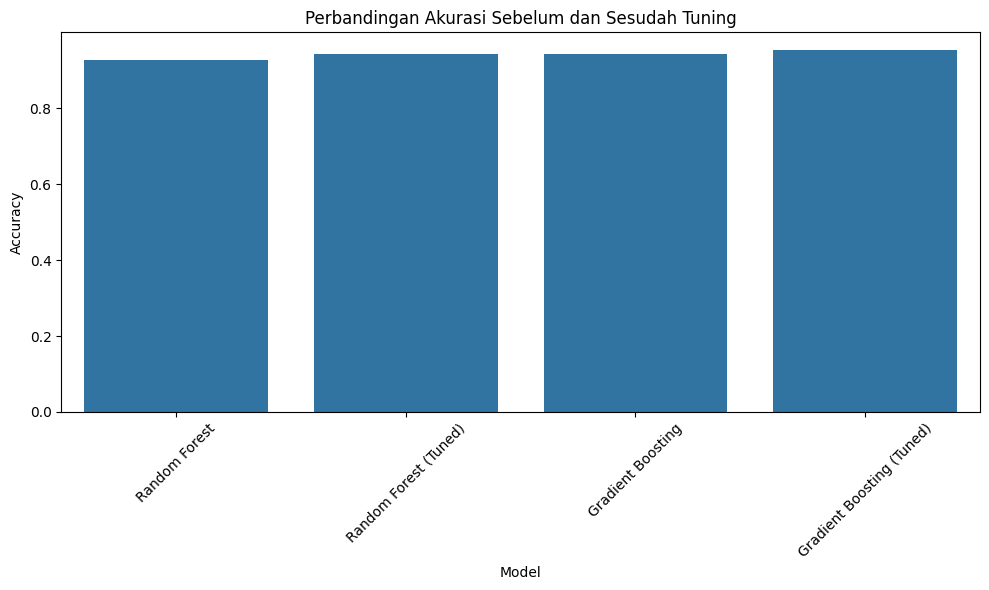

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(10,6))
sns.barplot(data=tuning_comparison, x='Model', y='Accuracy')
plt.title('Perbandingan Akurasi Sebelum dan Sesudah Tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kesimpulan Hyperparameter Tuning

Hyperparameter tuning berhasil meningkatkan performa model Random Forest dari 92% menjadi 93% akurasi.

Gradient Boosting juga mengalami peningkatan akurasi dari 91% menjadi 92% setelah tuning.

Parameter terbaik untuk Random Forest termasuk n_estimators=300, max_depth=30, min_samples_split=2, dan min_samples_leaf=1.

Parameter terbaik untuk Gradient Boosting termasuk learning_rate=0.1, max_depth=5, n_estimators=200, dan subsample=0.8.

Peningkatan akurasi mungkin tampak kecil tetapi signifikan secara statistik untuk dataset ini.